# House Price Prediction Model
<i><b>Hypothesis</b> :<br>To predict the price of a property which is on sale in Bangaluru, by providing the location, size, total sqarefoot, number of baths and balconies.</i>

Importing all the libraries need (Pandas, Numpy, matplotlib).

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

matplotlib.rcParams["figure.figsize"] = (20,10) #Set the size of plots

Reading the CSV file.</br>
This file contains data about houses that are on sale in Bangaluru. 

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


Analyze the dataset for a quick understanding.

In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#List of all the column names
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

Check the distribution of the numerical values.

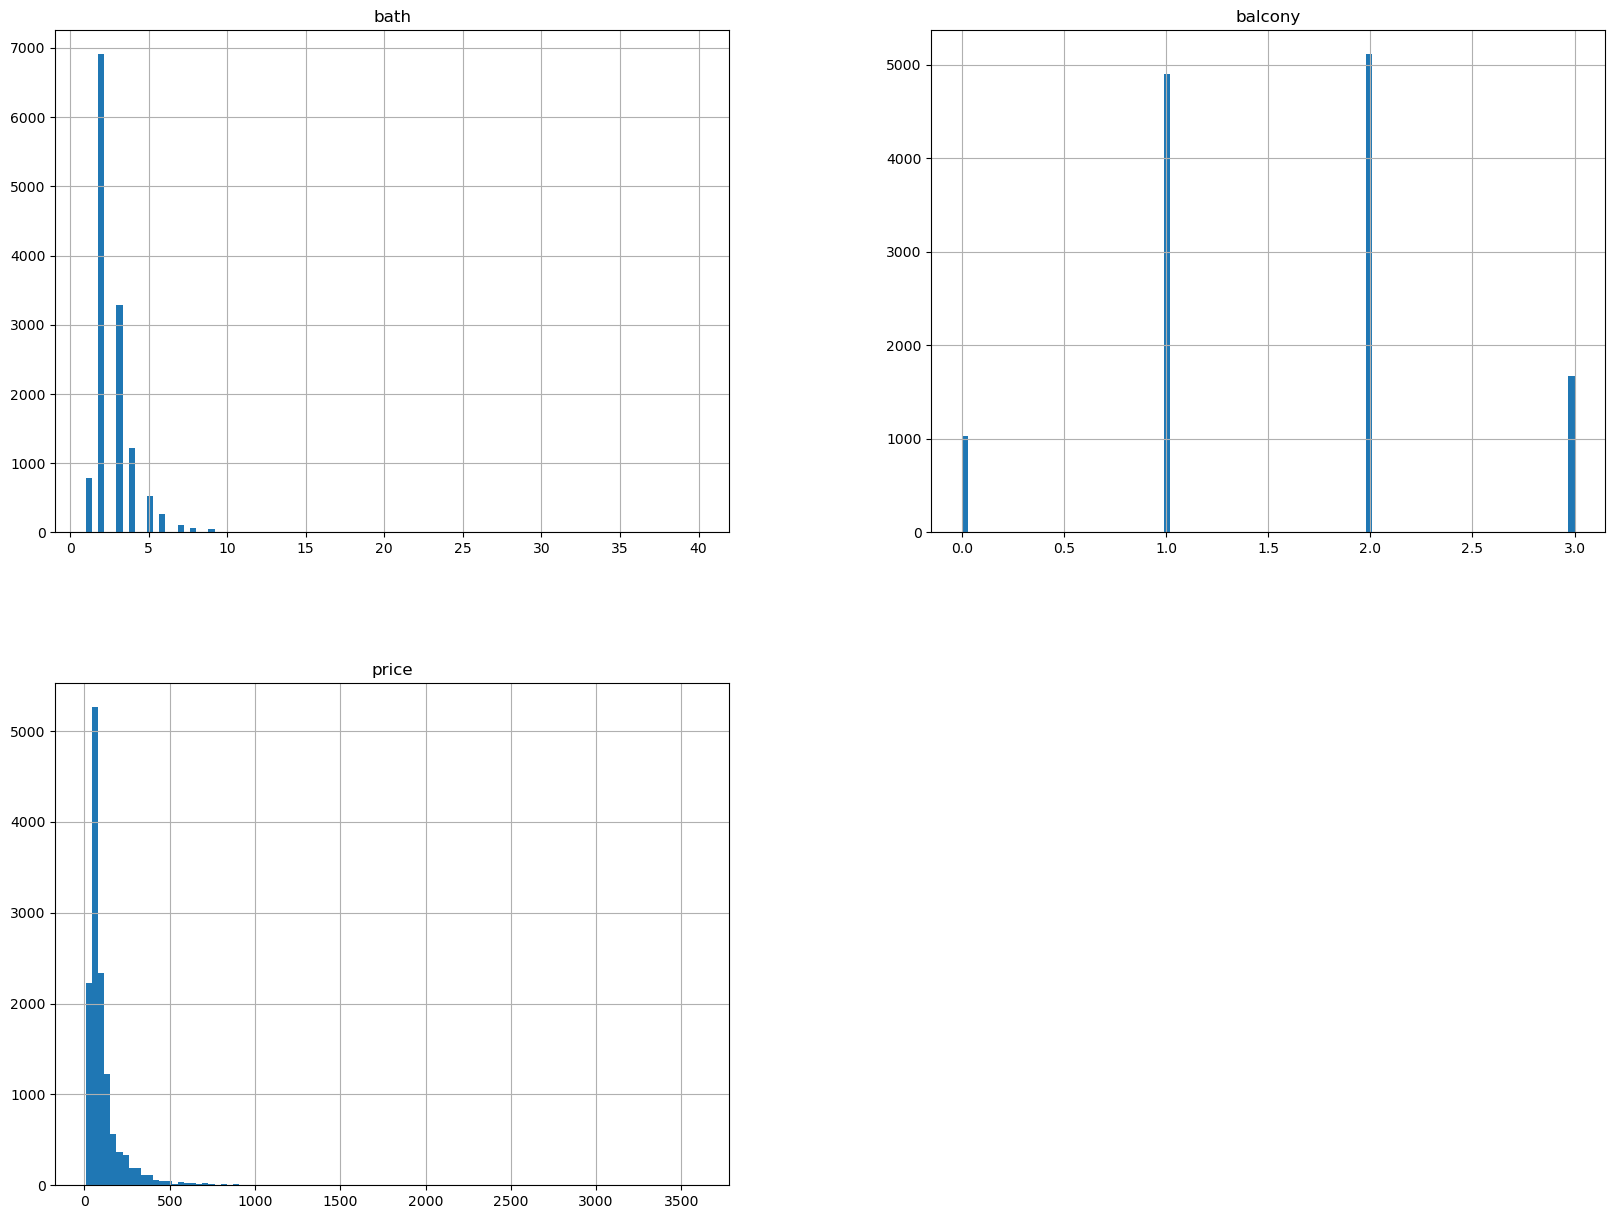

In [6]:
df.hist(bins=100, figsize=(20,15))
plt.show()

Looks like most of them are like in normal distribution. But they are skewed. So we have to normalize them later.

Number of properties for each area type.

In [7]:
new_df = df.groupby('area_type')
new_df['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Removing some unnecessary features from the dataset.

In [8]:
df2 = df.drop(['society', 'availability'], axis='columns')
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
#Number of unique values of each feature
df2.nunique()

area_type        4
location      1305
size            31
total_sqft    2117
bath            19
balcony          4
price         1994
dtype: int64

Here we can see, there are 4 types of areas and 1305 of locations.</br>We have to check on that locations later to findout can we reduce that number. Then we have to convert those catogorical values to numerics.

### Clearing missing values.

Get how many null values in each feature

In [10]:
df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

There are so many missing values in balcony feature. So lets check it and try to clean this up.

In [11]:
df2.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

We can asume that those nan values are for the properties that has more than 3 balconies.</br>So lets convert those nan values.</br></br>To show those higher values we can simply put 4. Because we know that those have higher number of balconies than the others, it is ok to put a higher number to represent that. But also they cant be to higher, otherwise the gap will consider in the model.

In [12]:
df2.fillna(value={'balcony':4}, inplace=True)

In [13]:
#Check the null values now.
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

For other features,there are very small number of missing values. </br>So lets just remove those.

In [14]:
df3 = df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [15]:
df3.shape

(13246, 7)

### Data cleaning

Get the unique values of the size feature

In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Create the BHK feature and get the only numerical value from the size feature.

In [17]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3['bhk'].unique()

/var/folders/6h/fpw492hx5gvg9pp1vflms7y40000gn/T/ipykernel_41434/1983165669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

Convert all the data in total_sqft feature to floats.

In [18]:
#Check the total_sqft feature
df3['total_sqft'].unique()
#Here we can see there are some values wich are in format of a range (eg: 1133 - 1384)
#We have to convert those values to a single value

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True
# This function tries to convert X value to a float. If it can, reurn will be True. If it couldn't retun False

Here are all the non numerical values in total_sqft column.</br> There are 190 data points represented in a range format. We have to convert those datapoints to a single float.

In [20]:
df3[~df3['total_sqft'].apply(isFloat)]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [21]:
#Convert those non numerical values in to numerical
def convertSqft(x):
    token = x.split('-')
    if len(token) == 2 :  
        average = ( float(token[0]) + float(token[1]) ) / 2
        return average
    try:
        return float(x)
    except:
        return x

In [22]:
#Try
convertSqft("22.5")

22.5

In [23]:
df4 = df3.copy()

In [24]:
df4['total_sqft'] = df4['total_sqft'].apply(convertSqft)
df4[~df4['total_sqft'].apply(isFloat)]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.50,1
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,4.0,265.00,9
775,Built-up Area,Basavanagara,1 BHK,1000Sq. Meter,2.0,1.0,93.00,1
872,Super built-up Area,Singapura Village,2 BHK,1100Sq. Yards,2.0,4.0,45.00,2
1019,Plot Area,Marathi Layout,1 Bedroom,5.31Acres,1.0,0.0,110.00,1
1086,Plot Area,Narasapura,2 Bedroom,30Acres,2.0,2.0,29.50,2
1400,Super built-up Area,Chamrajpet,9 BHK,716Sq. Meter,9.0,1.0,296.00,9
1712,Plot Area,Singena Agrahara,3 Bedroom,1500Sq. Meter,3.0,1.0,95.00,3
1743,Super built-up Area,Hosa Road,3 BHK,142.61Sq. Meter,3.0,1.0,115.00,3
1821,Plot Area,Sarjapur,3 Bedroom,1574Sq. Yards,3.0,1.0,76.00,3


Here are the values that totla_sqft is not represented as a flot.</br>
We can convert these values, But there are so little numbe of them. So lets just remove them.

In [25]:
#Removing all the non ne=umerical values from the total_sqft feature
df5 = df4[df4['total_sqft'].apply(isFloat)]

In [26]:
#Creating anew feature called price_pre_sqft
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5

/var/folders/6h/fpw492hx5gvg9pp1vflms7y40000gn/T/ipykernel_41434/1529234579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']


,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Super built-up Area,Richards Town,4 BHK,3600.0,5.0,4.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


### Reduce the number of locations

In [27]:
#Checking the number of values in each location
df5.location = df5.location.apply(lambda x: x.strip())

loaction_status = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
loaction_status

/var/folders/6h/fpw492hx5gvg9pp1vflms7y40000gn/T/ipykernel_41434/3028079352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.apply(lambda x: x.strip())


location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [28]:
#If the x of loaction_status is less than 10, just then return the value 'other'
def locationCleaner(x):
    if loaction_status[x] >= 10:
        return x
    else:
        return 'other'

Change each location which has less than 10 data points to other

In [29]:
df5.location = df5.location.apply(locationCleaner)

/var/folders/6h/fpw492hx5gvg9pp1vflms7y40000gn/T/ipykernel_41434/305629728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.location = df5.location.apply(locationCleaner)


In [30]:
loaction_status_new = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
loaction_status_new

location
other                   2732
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
                        ... 
Nagadevanahalli           10
Naganathapura             10
Sector 1 HSR Layout       10
Nagappa Reddy Layout      10
Basapura                  10
Name: location, Length: 255, dtype: int64

Now there are only 255 location. It's better than earlier.

### Outlier removel

Finding any properties that's sqft per bhk is less than 300.

In [31]:
df5[df5.total_sqft / df5.bhk < 300]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,4.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,4.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.98081
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.0
...,...,...,...,...,...,...,...,...,...
13277,Plot Area,other,7 Bedroom,1400.0,7.0,4.0,218.0,7,15571.428571
13279,Plot Area,other,6 Bedroom,1200.0,5.0,4.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


Here we get properties that are too small to live in.</br>
These may be inserted by mistake, Or they could be illigel properties.</br>
Any way we have to clean these up to create a genaric model.

In [32]:
#Remove all the outlier properties using sqft per bhk

df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df6

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Super built-up Area,other,4 BHK,3600.0,5.0,4.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


### Clearing properties that's pps is in the 1std away from the mean of that location

In [33]:
#Get stats of the price_per_sqft feature
df6.price_per_sqft.describe()

count     12456.0
unique     7340.0
top        5000.0
freq        146.0
Name: price_per_sqft, dtype: float64

In [34]:
# catogorize the df by the location and get the mean and standard deviation for each location
# The the select all the pps values that are apear in 1std from the mean.
# combine all values for each location

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (mean-std)) & (subdf.price_per_sqft < (mean+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [35]:
df7 = remove_pps_outliers(df6)
df7

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.00,4,15017.54386
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.00,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.00,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.00,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...,...,...
10217,Super built-up Area,other,2 BHK,1353.0,2.0,2.0,110.00,2,8130.081301
10218,Plot Area,other,1 Bedroom,812.0,1.0,0.0,26.00,1,3201.970443
10219,Super built-up Area,other,3 BHK,1440.0,2.0,2.0,63.93,3,4439.583333
10220,Super built-up Area,other,2 BHK,1075.0,2.0,2.0,48.00,2,4465.116279


### Compare price vs bhk in a location and analyze

In [36]:
#this function vreates scatterplot for a givven location
#Scatter plot plots the 2bhk and 3bhk propertie's total sqft vs price
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (5, 2.5)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label='2BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color = 'green', label='3BHK', s=50)
    
    plt.xlabel("Total Squarefeet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()

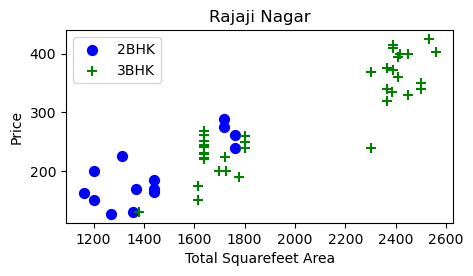

In [37]:
plot_scatter_chart(df7, 'Rajaji Nagar')

Here in this Rajaji Nagar scatter plot we can see there are some 3BHK properties that are less worth than the 2BHK properties.These coule be outliers.</br></br>

Here we have only plot the 2bhk and 3bhk.
But there could be theese kind of errors in 4,5,6 BHK too.

</br>So lets remove those.

In [38]:
#This function goup the data by the location
#Then calculate the mean, std, count for each BHK in that location
#Next remove any any property that values less than next lower bhk's mean value
#e.g: if a 2BHK property is less than the 1bhk mean value, it will be removed.
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices,axis='index')

In [39]:
df8 = remove_bhk_outliers(df7)
df8

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.54386
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...,...
10213,Carpet Area,other,2 BHK,1200.0,2.0,3.0,70.0,2,5833.333333
10214,Super built-up Area,other,1 BHK,1800.0,1.0,1.0,200.0,1,11111.111111
10217,Super built-up Area,other,2 BHK,1353.0,2.0,2.0,110.0,2,8130.081301
10218,Plot Area,other,1 Bedroom,812.0,1.0,0.0,26.0,1,3201.970443


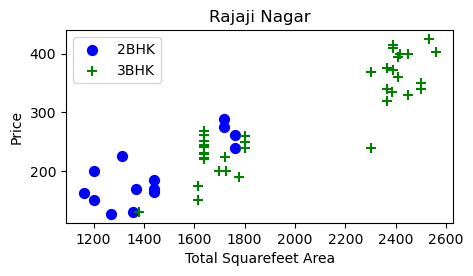

In [40]:
plot_scatter_chart(df7, 'Rajaji Nagar')

Now most of the outliers looks like remoed from bhk

### Visualizing the distributions and analyze

Distribution of the price per sqft feature

Text(0, 0.5, 'Count')

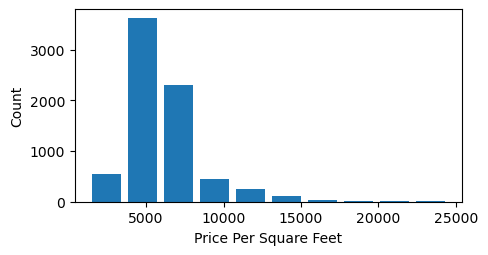

In [41]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
#It is skwed bell curve.

Distribution of bathrooms

Text(0, 0.5, 'Count')

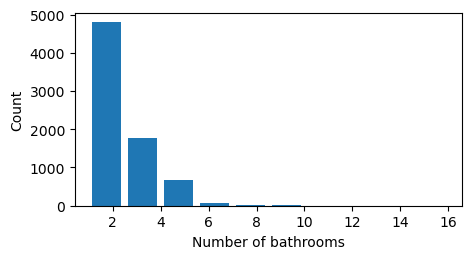

In [42]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Looks like there are some properties with more than 10 baths. That's not normal for a median house. Lets check those

In [43]:
df8[df8.bath>10]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
585,Plot Area,BTM 1st Stage,9 Bedroom,3300.0,14.0,4.0,500.0,9,15151.515152
5344,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,4.0,160.0,10,4000.0
8547,Super built-up Area,other,10 BHK,12000.0,12.0,4.0,525.0,10,4375.0
8633,Super built-up Area,other,16 BHK,10000.0,16.0,4.0,550.0,16,5500.0
9329,Super built-up Area,other,11 BHK,6000.0,12.0,4.0,150.0,11,2500.0
9642,Super built-up Area,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Here we see there are some properties that seems bit odd.
Like the first 9bhk one with 14 baths. 
These can be concider as outliers.</br>
Lets asume <B>any property which has +2 more baths than the bhk concider as an outlier here.</B>

In [44]:
#Here are the outliers
df8[df8.bath>df8.bhk+2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
585,Plot Area,BTM 1st Stage,9 Bedroom,3300.0,14.0,4.0,500.0,9,15151.515152
1642,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.03252
5305,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,4.0,450.0,4,6428.571429
6792,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.03433
8476,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [45]:
#remove outliers form the bathroom column
df9 = df8[df8.bath<df8.bhk+2]
df9

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.54386
1,Super built-up Area,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...,...
10213,Carpet Area,other,2 BHK,1200.0,2.0,3.0,70.0,2,5833.333333
10214,Super built-up Area,other,1 BHK,1800.0,1.0,1.0,200.0,1,11111.111111
10217,Super built-up Area,other,2 BHK,1353.0,2.0,2.0,110.0,2,8130.081301
10218,Plot Area,other,1 Bedroom,812.0,1.0,0.0,26.0,1,3201.970443


Finaly remove unnececery features form the data set.

In [46]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2
...,...,...,...,...,...,...,...
10213,Carpet Area,other,1200.0,2.0,3.0,70.0,2
10214,Super built-up Area,other,1800.0,1.0,1.0,200.0,1
10217,Super built-up Area,other,1353.0,2.0,2.0,110.0,2
10218,Plot Area,other,812.0,1.0,0.0,26.0,1


### Convert catogorical features to numerical

In [47]:
#Convert location to one-hot encording

dummies = pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10217,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [48]:
# Convert area_type	 to one-hot encording

dummies_area = pd.get_dummies(df10.area_type)
dummies_area

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,True,False,False,False
4,False,False,False,True
...,...,...,...,...
10213,False,True,False,False
10214,False,False,False,True
10217,False,False,False,True
10218,False,False,True,False


Remove location and area_type features and connect dummeis

In [49]:
df11 = pd.concat([df10, dummies_area, dummies.drop('other', axis='columns')], axis="columns")
df11.drop(['location', 'area_type'], axis='columns', inplace=True)
df11

,total_sqft,bath,balcony,price,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,194.0,3,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,235.0,3,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,130.0,3,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,148.0,2,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,1200.0,2.0,3.0,70.0,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10214,1800.0,1.0,1.0,200.0,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10217,1353.0,2.0,2.0,110.0,2,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10218,812.0,1.0,0.0,26.0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Train-Test split and normalization

In [50]:
#All the feature colums
x = df11.drop('price', axis='columns')
x

,total_sqft,bath,balcony,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Block Koramangala,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,3,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,3,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,3,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,2,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,1200.0,2.0,3.0,2,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10214,1800.0,1.0,1.0,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10217,1353.0,2.0,2.0,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10218,812.0,1.0,0.0,1,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
#The lables
y = df11['price']
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10213     70.0
10214    200.0
10217    110.0
10218     26.0
10221    400.0
Name: price, Length: 7291, dtype: float64

Split the data set into train and test splits 80-20


In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [53]:
x_train

,total_sqft,bath,balcony,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Block Koramangala,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
6943,1089.0,2.0,1.0,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1933,770.0,1.0,1.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
671,1007.0,2.0,1.0,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5630,1295.0,2.0,2.0,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8153,1200.0,2.0,0.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,1260.0,2.0,1.0,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4284,1962.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1624,1200.0,2.0,1.0,2,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5716,1525.0,2.0,2.0,3,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Standardise the data

In [54]:
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train_scalled = scaller.fit_transform(x_train)
x_test_scalled = scaller.transform(x_test)

In [55]:
x_train_scalled

array([[-0.45547581, -0.43776321, -0.70494485, ..., -0.06011519,
        -0.03209153, -0.0706924 ],
       [-0.83278944, -1.5077695 , -0.70494485, ..., -0.06011519,
        -0.03209153, -0.0706924 ],
       [-0.55246552, -0.43776321, -0.70494485, ..., -0.06011519,
        -0.03209153, -0.0706924 ],
       ...,
       [-0.32418486, -0.43776321, -0.70494485, ..., -0.06011519,
        -0.03209153, -0.0706924 ],
       [ 0.06022558, -0.43776321,  0.4276277 , ..., -0.06011519,
        -0.03209153, -0.0706924 ],
       [-0.98063961, -1.5077695 , -0.70494485, ..., -0.06011519,
        -0.03209153, -0.0706924 ]])

### Hyper parameter tuning and Model training

In [56]:
#Here are the algorithums we try to build a model on
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Hyper parameter tunning

In [57]:
algos = {
    'linear_regression' : {
        'model': LinearRegression(),
        'params':{
            'fit_intercept': [True, False],
        }
    },
    
    ##########################################################
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1, 2, 10],
            'selection': ['random', 'cyclic']
        }
    },
    
    ##########################################################
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error','absolute_error'],
            'splitter': ['best'],
            'max_depth': [5, 10]
        }
    },
    
    ##########################################################
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1],
            'solver': ['auto', 'svd']
        }
    },
    
    ##########################################################
    'elastic_net': {
        'model': ElasticNet(),
        'params': {
            'alpha': [1, 10],
            'l1_ratio': [0.1, 0.5]
        }
    },
    
    ##########################################################
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10]
        }
    },
    
    ##########################################################
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5],
        }
    }
    
    }

In [58]:
#Hyper parameter tuning
#Grid search using the algos dictionory which has all the parameters for each model.
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for algo_name, config in algos.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1)
    gs.fit(x_train_scalled,y_train)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
})

results = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [59]:
results

,model,best_score,best_params
0,linear_regression,-1.358532e+23,{'fit_intercept': True}
1,lasso,8.400904e-01,"{'alpha': 0.1, 'selection': 'random'}"
2,decision_tree,7.142299e-01,"{'criterion': 'absolute_error', 'max_depth': 1..."
3,ridge,8.417560e-01,"{'alpha': 1, 'solver': 'svd'}"
4,elastic_net,7.635612e-01,"{'alpha': 1, 'l1_ratio': 0.5}"
5,random_forest,7.757187e-01,"{'max_depth': 10, 'n_estimators': 200}"
6,gradient_boosting,7.837784e-01,"{'max_depth': 3, 'n_estimators': 200}"


As we can see here, the ridge model has the best scores. So lest pick the ridge model and train it.

In [60]:
ridge_model = Ridge(alpha=1, solver='svd')
ridge_model.fit(x_train_scalled, y_train)

Ridge(alpha=1, solver='svd')

Check the acurecy of the model

In [61]:
#Check the accurasy of the model using the test set.
ridge_model.score(x_test_scalled, y_test)

0.8574834065054058

It has 85% present acuracy.

Let's try by giving a new value to model.

In [62]:
# First create an npArray which lenth is equal to the number of columns in train set 
# Put the sqft, bath, bhk in apropreate locations
#Then get the column number form the table and put 1 in that location in numpy array

def predict_price(area,location,sqft,bath,bhk):  
    #This line will get the column number of that area_type
    try :
        area_index = np.where(x.columns==area)[0][0]
    except:
        area_index = -1
        
    #This line will get the column number of that location
    try :
        loc_index = np.where(x.columns==location)[0][0]
    except:
        loc_index = -1

    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if area_index >= 0:
        z[area_index] = 1
    if loc_index >= 0:
        z[loc_index] = 1
    
    #Normalize before predicting
    mean_train = np.mean(x_train, axis=0)
    std_train = np.std(x_train, axis=0)
    
    z_normalized = (z - mean_train) / std_train

    #Predictions
    return ridge_model.predict([z_normalized])[0]

In [63]:
#Trying a simple test
predict_price('Super built-up  Area','Whitefield', 1170, 2,2)

71.04812736558013

In [64]:
#Serelize the model and save it
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(ridge_model,f)

In [65]:
#Save all teh column data in a text file
#To find the location column index later

f = open("features.txt", "w")
for feature in x.columns:
    f.write(feature + ",")
f.close()